In [2]:
import requests
import pandas as pd
import jdatetime
import matplotlib.pyplot as plt


In [3]:
urlD ="https://api.tgju.org/v1/market/indicator/summary-table-data/price_dollar_rl?lang=fa&order_dir=asc&draw=9&columns[0][data]=0&columns[0][name]=&columns[0][searchable]=true&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=1&columns[1][name]=&columns[1][searchable]=true&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=2&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=3&columns[3][name]=&columns[3][searchable]=true&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=4&columns[4][name]=&columns[4][searchable]=true&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=5&columns[5][name]=&columns[5][searchable]=true&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=6&columns[6][name]=&columns[6][searchable]=true&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=7&columns[7][name]=&columns[7][searchable]=true&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&start=0&length=4000&search=&order_col=&order_dir=&from=1391/01/01&to=1401/12/31&convert_to_ad=1&_=1674500928470"
dataD = requests.get(urlD).json()
dfD = pd.DataFrame(dataD["data"], columns =['START', 'MIN','HIGH','END','CHANGES','P.CHANGES','DATE1','DATE2'])
dfD['CHANGES'] = dfD['CHANGES'].str.extract(r'>(.*)<')
dfD['P.CHANGES'] = dfD['P.CHANGES'].str.extract(r'>(.*)<')
dfD.to_csv("dollar.csv")

In [4]:
urlG = "https://api.tgju.org/v1/market/indicator/summary-table-data/geram18?lang=fa&order_dir=asc&draw=10&columns[0][data]=0&columns[0][name]=&columns[0][searchable]=true&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=1&columns[1][name]=&columns[1][searchable]=true&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=2&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=3&columns[3][name]=&columns[3][searchable]=true&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=4&columns[4][name]=&columns[4][searchable]=true&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=5&columns[5][name]=&columns[5][searchable]=true&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=6&columns[6][name]=&columns[6][searchable]=true&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=7&columns[7][name]=&columns[7][searchable]=true&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&start=0&length=3000&search=&order_col=&order_dir=&from=1391/01/01&to=1401/12/01&convert_to_ad=1&_=1674622038925"
dataG = requests.get(urlG).json()
dfG = pd.DataFrame(dataG["data"], columns =['START', 'MIN','HIGH','END','CHANGES','P.CHANGES','DATE1','DATE2'])
dfG['CHANGES'] = dfG['CHANGES'].str.extract(r'>(.*)<')
dfG['P.CHANGES'] = dfG['P.CHANGES'].str.extract(r'>(.*)<')
dfG.to_csv("Gold.csv")

In [5]:
def complex_function(x):
    return jdatetime.date(int(x[0:4]),int(x[5:7]),int(x[8:10])).togregorian()

In [6]:
def replace_function(x):
    return x.replace(',','')

In [7]:
def replace2_function(x):
    return x.replace('/','')

In [25]:
df = pd.read_csv("dollar.csv")
df['DATE'] = df['DATE2'].apply(complex_function)
df['START'] = df['START'].apply(replace_function)
df['DATE2'] = df['DATE2'].apply(replace2_function)
df.drop(['DATE1'], axis=1,inplace=True)
df.set_index("DATE", inplace=True)
df.drop(['Unnamed: 0'], axis=1,inplace=True)

df. sort_index(ascending=True,inplace=True)
df

,START,MIN,HIGH,END,CHANGES,P.CHANGES,DATE2
DATE,,,,,,,
2012-03-25,18900,"18,900","18,900","18,900",250,1.32%,13910106
2012-03-26,19000,"19,000","19,000","19,000",100,0.53%,13910107
2012-03-28,19200,"19,200","19,200","19,200",200,1.05%,13910109
2012-03-29,19200,"19,200","19,200","19,200",-,NaN,13910110
2012-04-02,19120,"19,120","19,120","19,120",80,0.42%,13910114
...,...,...,...,...,...,...,...
2023-01-29,436480,"432,800","439,800","438,810",1680,0.38%,14011109
2023-01-30,439400,"433,810","440,900","436,560",2250,0.52%,14011110
2023-01-31,435880,"433,310","438,900","437,290",730,0.17%,14011111


In [26]:
df["START"] = df["START"].astype("int")


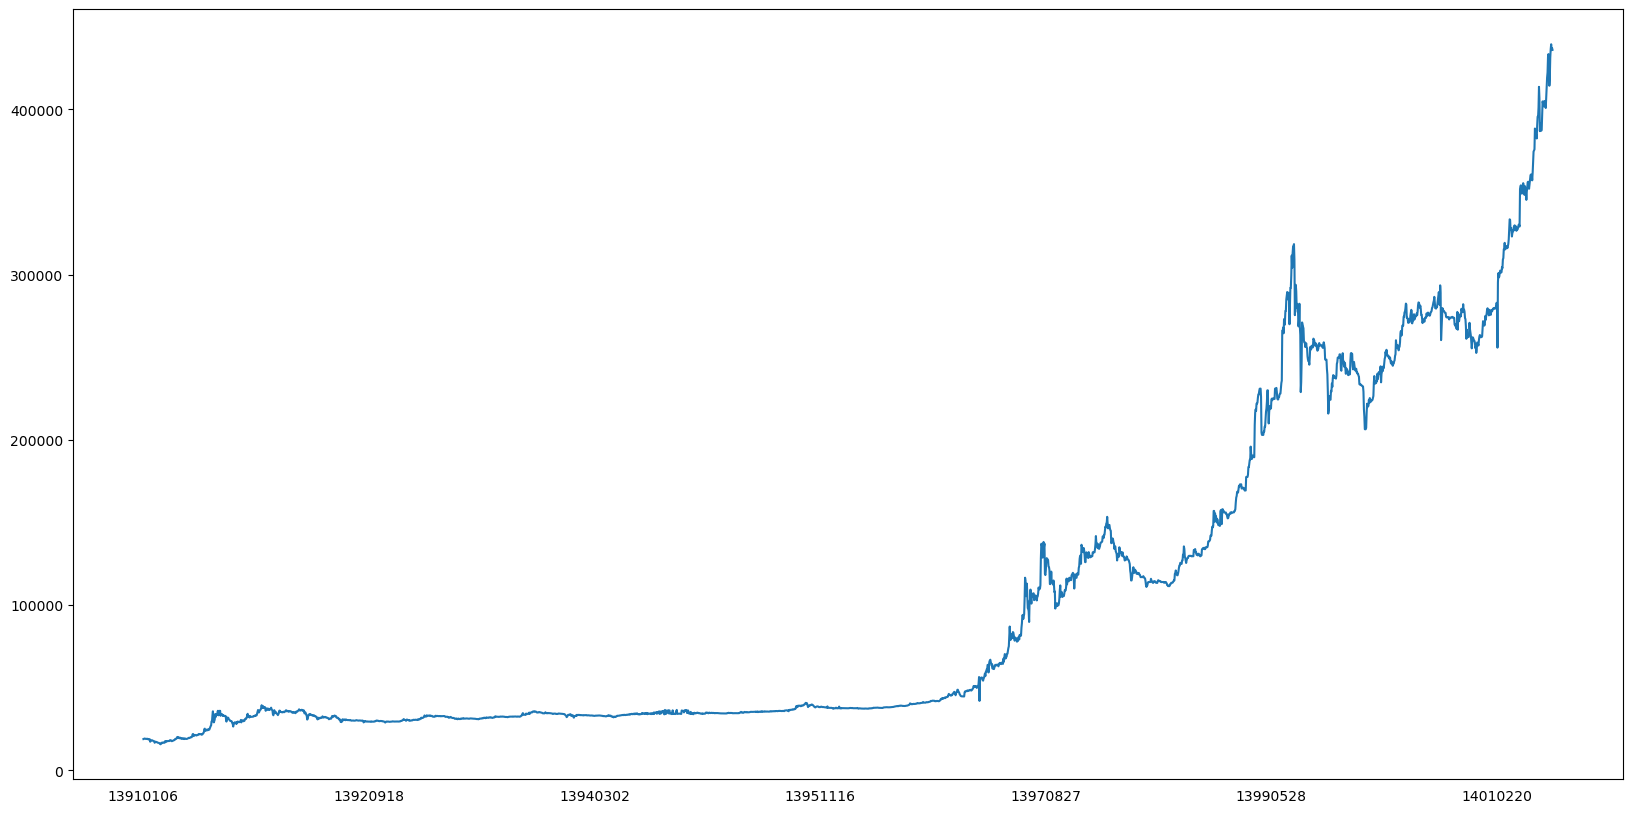

In [27]:
#import pandas as pd
#import matplotlib.pyplot as plt

##df = pd.read_csv("dollar2.csv")
x = df['DATE2'].tolist()#[500:2500]
y = df['START'].tolist()#[500:2500]
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(x,y)

every_nth =500
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax.tick_params(bottom=False)
plt.show()